In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [3]:
final_df=pd.read_csv('ComplexPie_MS_PerStep.csv')

#### Step - Add Water

In [4]:
filtered_water = final_df[final_df['Step'].str.strip() == 'Add water']
filtered_water

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
6,C001,36,Add water,100.789411,148.119862,123.624984,133.256456,147.716461,329.876648,0.000000,0.000000
17,C003,58,Add water,73.014737,81.427021,145.737973,114.244999,212.487411,237.536156,160.975607,109.222516
28,C006,42,Add water,0.000000,7416.562265,0.000000,0.000000,5474.310174,4194.656740,0.000000,0.000000
39,C008,34,Add water,182.744824,265.491068,199.151451,215.109480,170.052774,445.012205,423.942647,352.392494
50,C009,24,Add water,153.981014,232.855560,174.022086,183.790053,164.283716,406.946399,372.477972,259.926184
61,C012,54,Add water,175.354869,196.012047,297.680835,225.141570,401.264098,323.611320,249.191077,209.827920
72,C013,48,Add water,170.883674,209.341897,394.663267,292.824260,557.470761,367.739503,292.078650,243.900349
83,C016,39,Add water,316.064957,286.643499,281.679164,288.788837,346.585941,559.016239,502.062630,352.823481
94,C017,36,Add water,46.595893,198.461201,62.507003,95.368106,137.648673,318.221513,244.712189,181.892297
105,C020,30,Add water,110.717918,214.412853,290.653925,227.620506,341.882591,305.704861,422.832032,169.617637


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_water = filtered_water.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_water.select_dtypes(include=['float64', 'int64']).columns
filtered_water[numerical_cols] = filtered_water[numerical_cols].replace(0, np.nan)

filtered_water[numerical_cols] = imputer.fit_transform(filtered_water[numerical_cols])
filtered_water

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
6,C001,36.0,Add water,100.789411,148.119862,123.624984,133.256456,147.716461,329.876648,218.324367,184.970963
17,C003,58.0,Add water,73.014737,81.427021,145.737973,114.244999,212.487411,237.536156,160.975607,109.222516
28,C006,42.0,Add water,606.043573,7416.562265,681.359516,673.056011,5474.310174,4194.656740,764.591321,706.371067
39,C008,34.0,Add water,182.744824,265.491068,199.151451,215.109480,170.052774,445.012205,423.942647,352.392494
50,C009,24.0,Add water,153.981014,232.855560,174.022086,183.790053,164.283716,406.946399,372.477972,259.926184
61,C012,54.0,Add water,175.354869,196.012047,297.680835,225.141570,401.264098,323.611320,249.191077,209.827920
72,C013,48.0,Add water,170.883674,209.341897,394.663267,292.824260,557.470761,367.739503,292.078650,243.900349
83,C016,39.0,Add water,316.064957,286.643499,281.679164,288.788837,346.585941,559.016239,502.062630,352.823481
94,C017,36.0,Add water,46.595893,198.461201,62.507003,95.368106,137.648673,318.221513,244.712189,181.892297
105,C020,30.0,Add water,110.717918,214.412853,290.653925,227.620506,341.882591,305.704861,422.832032,169.617637


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Water',
    'HeadCamera Distance': 'HeadCamera Distance - Add Water',
    'LeftElbow Distance': 'LeftElbow Distance - Add Water',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Water',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Water',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Water',
    'RightElbow Distance': 'RightElbow Distance - Add Water',
    'RightShoulder Distance': 'RightShoulder Distance - Add Water'
}

# Rename columns
filtered_water = filtered_water.rename(columns=new_column_names)
filtered_water

,Participant,Block Design Raw Score,Step,Chest Distance - Add Water,HeadCamera Distance - Add Water,LeftElbow Distance - Add Water,LeftShoulder Distance - Add Water,MotionControllerLeft Distance - Add Water,MotionControllerRight Distance - Add Water,RightElbow Distance - Add Water,RightShoulder Distance - Add Water
6,C001,36.0,Add water,100.789411,148.119862,123.624984,133.256456,147.716461,329.876648,218.324367,184.970963
17,C003,58.0,Add water,73.014737,81.427021,145.737973,114.244999,212.487411,237.536156,160.975607,109.222516
28,C006,42.0,Add water,606.043573,7416.562265,681.359516,673.056011,5474.310174,4194.656740,764.591321,706.371067
39,C008,34.0,Add water,182.744824,265.491068,199.151451,215.109480,170.052774,445.012205,423.942647,352.392494
50,C009,24.0,Add water,153.981014,232.855560,174.022086,183.790053,164.283716,406.946399,372.477972,259.926184
61,C012,54.0,Add water,175.354869,196.012047,297.680835,225.141570,401.264098,323.611320,249.191077,209.827920
72,C013,48.0,Add water,170.883674,209.341897,394.663267,292.824260,557.470761,367.739503,292.078650,243.900349
83,C016,39.0,Add water,316.064957,286.643499,281.679164,288.788837,346.585941,559.016239,502.062630,352.823481
94,C017,36.0,Add water,46.595893,198.461201,62.507003,95.368106,137.648673,318.221513,244.712189,181.892297
105,C020,30.0,Add water,110.717918,214.412853,290.653925,227.620506,341.882591,305.704861,422.832032,169.617637


In [7]:
tracker_columns = ['Chest Distance - Add Water', 'HeadCamera Distance - Add Water', 'LeftElbow Distance - Add Water', 'LeftShoulder Distance - Add Water',
                   'RightElbow Distance - Add Water', 'RightShoulder Distance - Add Water', 'MotionControllerLeft Distance - Add Water',
                   'MotionControllerRight Distance - Add Water']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_water, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_water[block_design_col], filtered_water[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_water, tracker_columns, block_design_col)
correlation_df


,Tracker,Correlation,P-value
0,Chest Distance - Add Water,-0.084195,0.756552
1,HeadCamera Distance - Add Water,-0.222715,0.407057
2,LeftElbow Distance - Add Water,0.004428,0.987015
3,LeftShoulder Distance - Add Water,-0.054613,0.840793
4,RightElbow Distance - Add Water,-0.166913,0.536672
5,RightShoulder Distance - Add Water,-0.075332,0.781565
6,MotionControllerLeft Distance - Add Water,0.209440,0.436275
7,MotionControllerRight Distance - Add Water,-0.134219,0.620192


In [8]:
#filtered_water.to_csv('ComplexPie_AddWater.csv',index=False)

#### Scatterplot between Block Design Score and Distance covered by Chest Tracker under "Step - Add Water"

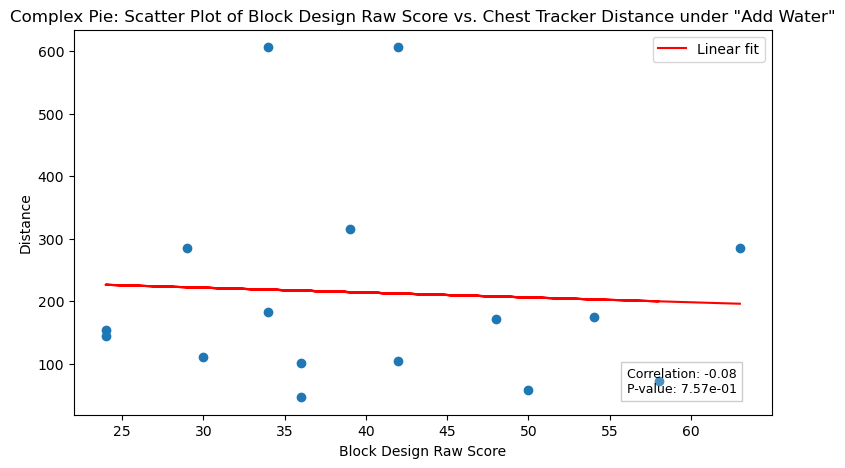

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = filtered_water
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest Distance - Add Water'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '49 CP_WaterDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

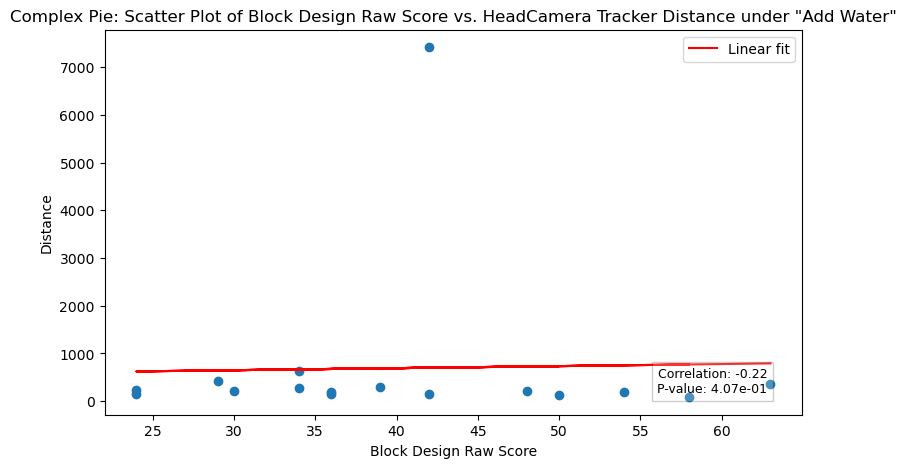

In [11]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['HeadCamera Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['HeadCamera Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['HeadCamera Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '50 CP_WaterDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

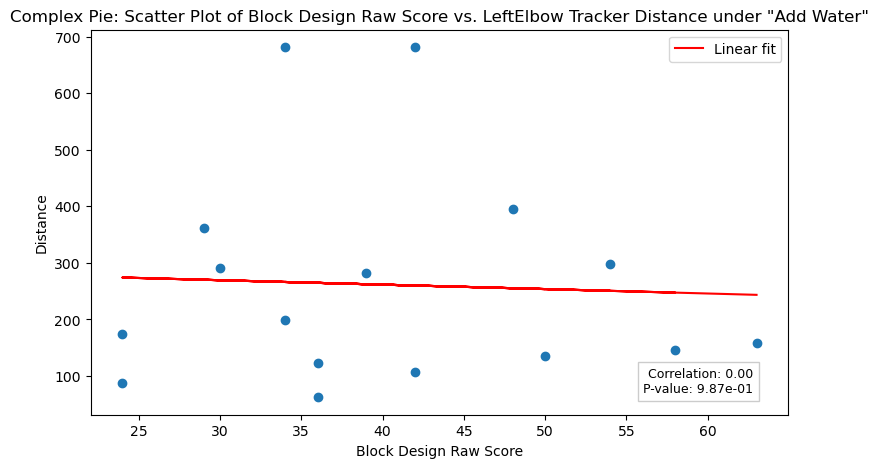

In [13]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['LeftElbow Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['LeftElbow Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['LeftElbow Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '52 CP_WaterDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

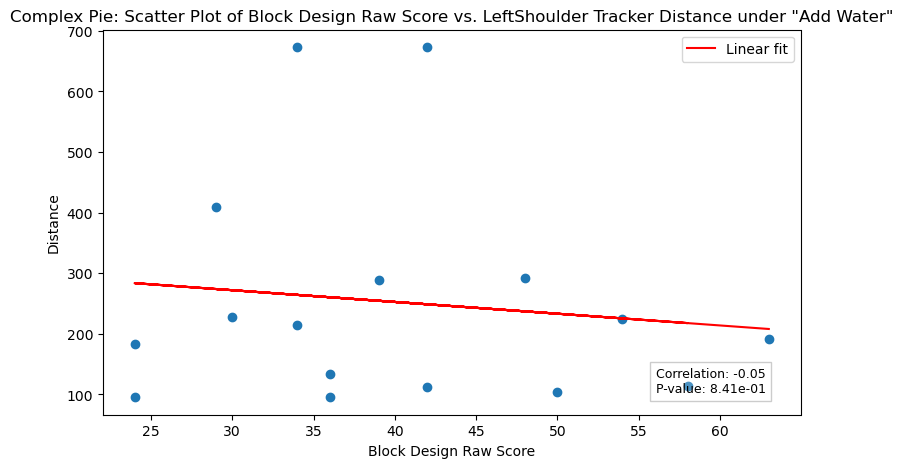

In [14]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['LeftShoulder Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['LeftShoulder Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['LeftShoulder Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '53 CP_WaterDistanceLeftShouldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

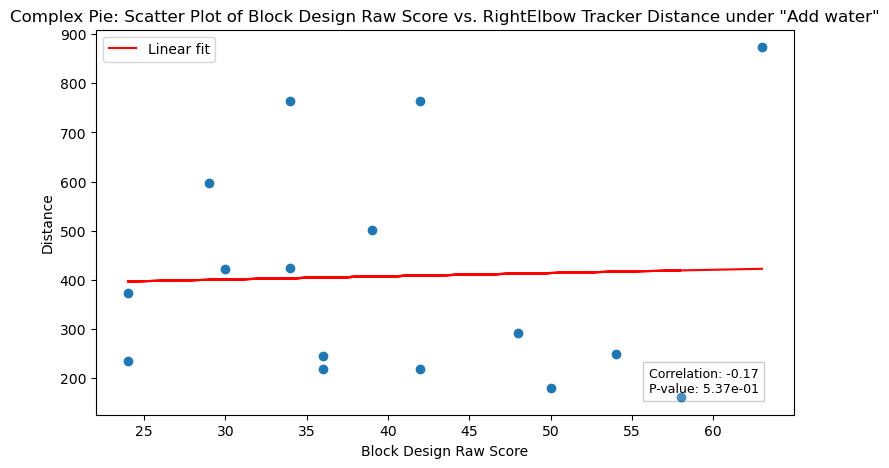

In [12]:
rightelbow_df = filtered_water
correlation, p_value = spearmanr(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow Distance - Add Water'], 1)
fit_line = slope * rightelbow_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(rightelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '51 CP_WaterDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

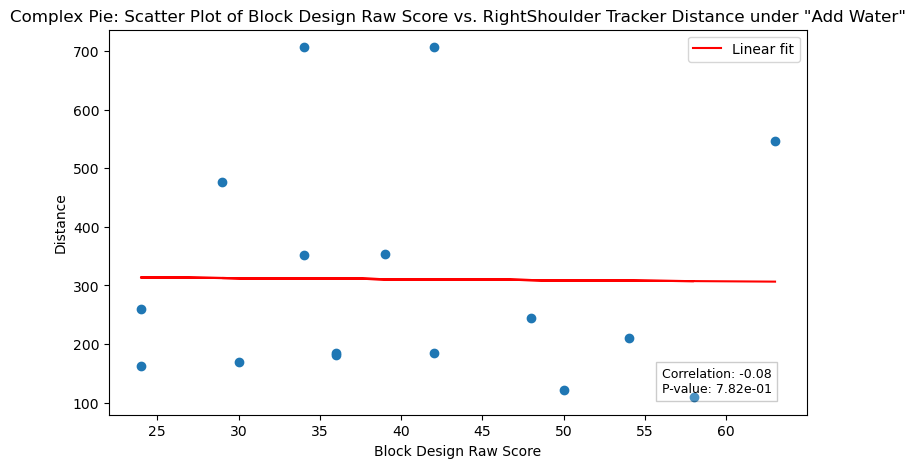

In [15]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['RightShoulder Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['RightShoulder Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['RightShoulder Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '54 CP_WaterDistanceRightShouldr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

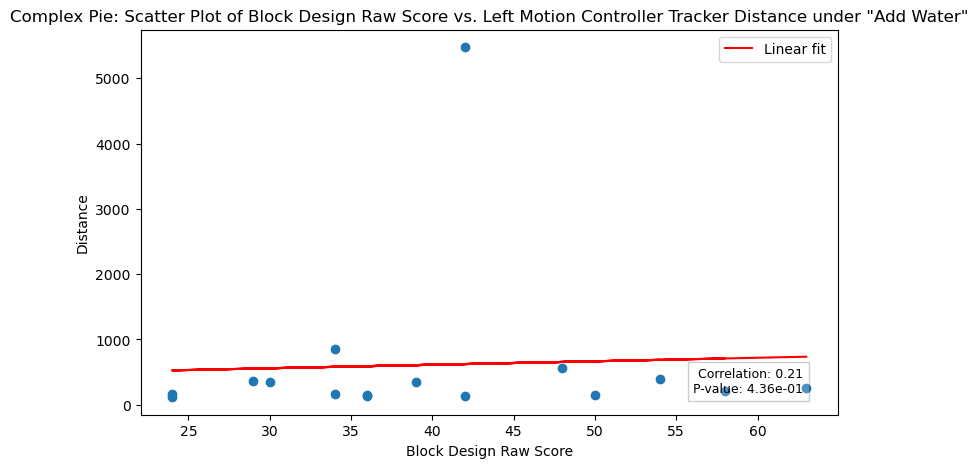

In [17]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerLeft Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerLeft Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerLeft Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Left Motion Controller Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '55 CP_WaterDistanceLeftContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

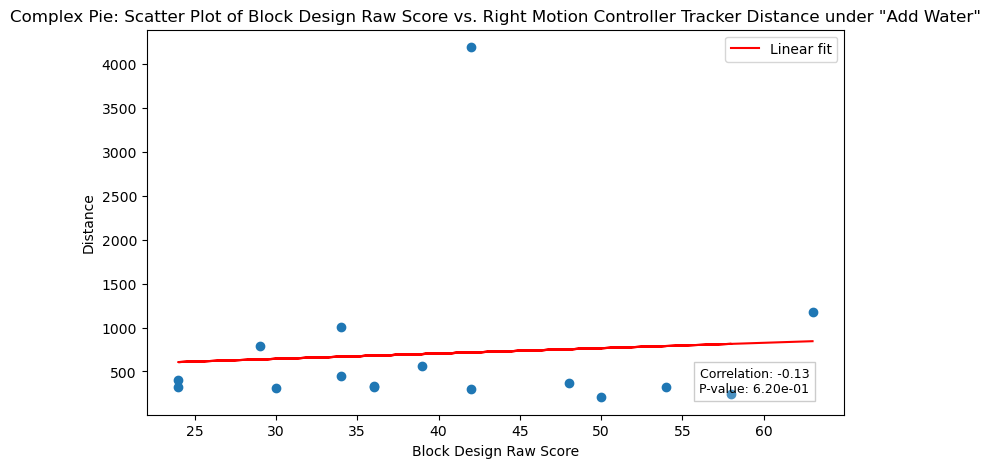

In [18]:
correlation, p_value = spearmanr(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerRight Distance - Add Water'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerRight Distance - Add Water'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_water['Block Design Raw Score'], filtered_water['MotionControllerRight Distance - Add Water'], 1)
fit_line = slope * filtered_water['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_water['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Right Motion Controller Tracker Distance under "Add Water"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '56 CP_WaterDistanceRightContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()